# dataset : [KAGGLE](https://www.kaggle.com/datasets/upam22/ecommerce-customer-churn-data)

In [ ]:
!pip install pyjanitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 4.9 MB/s eta 0:00:00


In [ ]:
import janitor

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%run '/content/pandas_missing_extension.ipynb'

In [ ]:
data_df = pd.read_csv('/content/ecom_data.csv')
data_df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


# EDA

In [ ]:
data_df.dtypes

,0
CustomerID,int64
Churn,int64
Tenure,float64
PreferredLoginDevice,object
CityTier,int64
WarehouseToHome,float64
PreferredPaymentMode,object
Gender,object
HourSpendOnApp,float64
NumberOfDeviceRegistered,int64


In [ ]:
data_df.dtypes.value_counts()

,count
int64,8
float64,7
object,5


In [ ]:
data_df.shape

(5630, 20)

# ANALISIS DE DATOS FALTANTES

In [ ]:
data_df.missing.number_missing()

np.int64(1856)

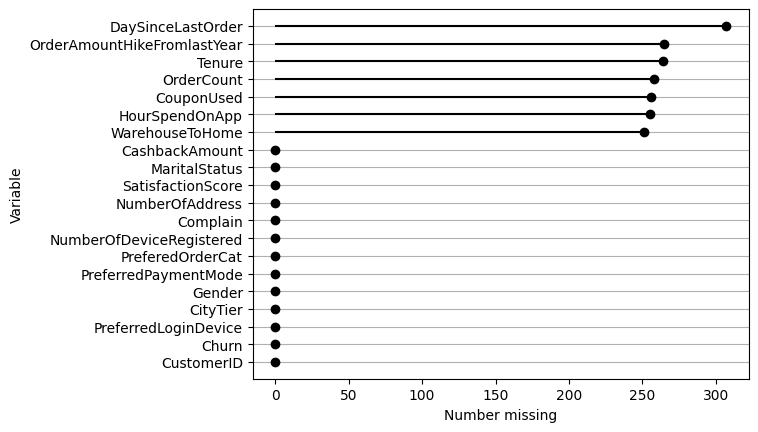

In [ ]:
data_df.missing.missing_variable_plot()

# NORMALIZACION DE COLUMNAS

In [ ]:
data_df_raw = (
    data_df.clean_names(
        case_type="snake"
    )
)
data_df_raw.head(2)

,customer_id,churn,tenure,preferred_login_device,city_tier,warehouse_to_home,preferred_payment_mode,gender,hour_spend_on_app,number_of_device_registered,prefered_order_cat,satisfaction_score,marital_status,number_of_address,complain,order_amount_hike_fromlast_year,coupon_used,order_count,day_since_last_order,cashback_amount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121


In [ ]:
data_df_raw.columns

Index(['customer_id', 'churn', 'tenure', 'preferred_login_device', 'city_tier',
       'warehouse_to_home', 'preferred_payment_mode', 'gender',
       'hour_spend_on_app', 'number_of_device_registered',
       'prefered_order_cat', 'satisfaction_score', 'marital_status',
       'number_of_address', 'complain', 'order_amount_hike_fromlast_year',
       'coupon_used', 'order_count', 'day_since_last_order',
       'cashback_amount'],
      dtype='object')

# IMPUTACIÓN DE DATOS FALTANTES

In [ ]:
data_df_clean = data_df_raw.copy()

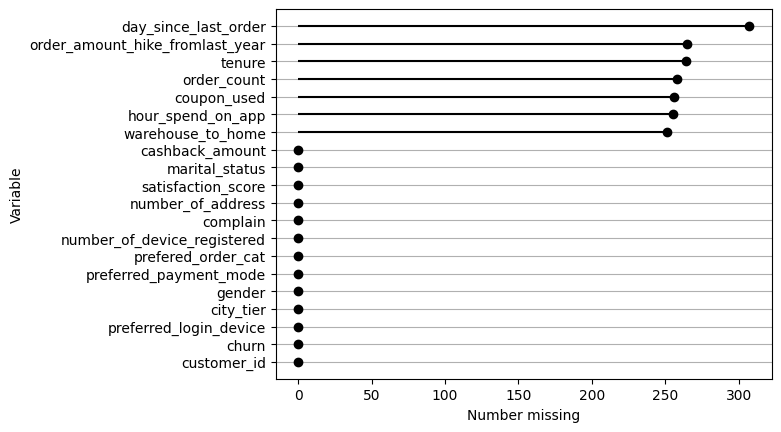

In [ ]:
data_df_clean.missing.missing_variable_plot()

In [ ]:
data_df_clean.columns

Index(['customer_id', 'churn', 'tenure', 'preferred_login_device', 'city_tier',
       'warehouse_to_home', 'preferred_payment_mode', 'gender',
       'hour_spend_on_app', 'number_of_device_registered',
       'prefered_order_cat', 'satisfaction_score', 'marital_status',
       'number_of_address', 'complain', 'order_amount_hike_fromlast_year',
       'coupon_used', 'order_count', 'day_since_last_order',
       'cashback_amount'],
      dtype='object')

In [ ]:
missing_variables_list = ['day_since_last_order','order_amount_hike_fromlast_year','tenure']

for missing_variable in missing_variables_list:
    print(f'-------- imputacion de {missing_variable} ---------------------')
    data_df_clean[missing_variable] = data_df_clean[missing_variable].fillna(data_df_clean[missing_variable].mean())
    print(f' media original {missing_variable} : {round(data_df_raw[missing_variable].mean(),2)} | media sin nulos de {missing_variable} : {round(data_df_clean[missing_variable].mean(),2)}')

-------- imputacion de day_since_last_order ---------------------
 media original day_since_last_order : 4.54 | media sin nulos de day_since_last_order : 4.54
-------- imputacion de order_amount_hike_fromlast_year ---------------------
 media original order_amount_hike_fromlast_year : 15.71 | media sin nulos de order_amount_hike_fromlast_year : 15.71
-------- imputacion de tenure ---------------------
 media original tenure : 10.19 | media sin nulos de tenure : 10.19


## DaySinceLastOrder

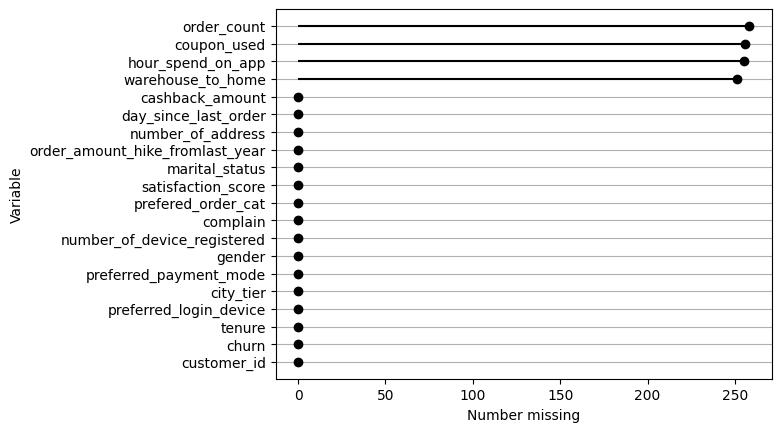

In [ ]:
data_df_clean.missing.missing_variable_plot()

In [ ]:
data_df_clean.dtypes

,0
customer_id,int64
churn,int64
tenure,float64
preferred_login_device,object
city_tier,int64
warehouse_to_home,float64
preferred_payment_mode,object
gender,object
hour_spend_on_app,float64
number_of_device_registered,int64


# CORRELACIÓN DE VARIABLES NÚMERICAS

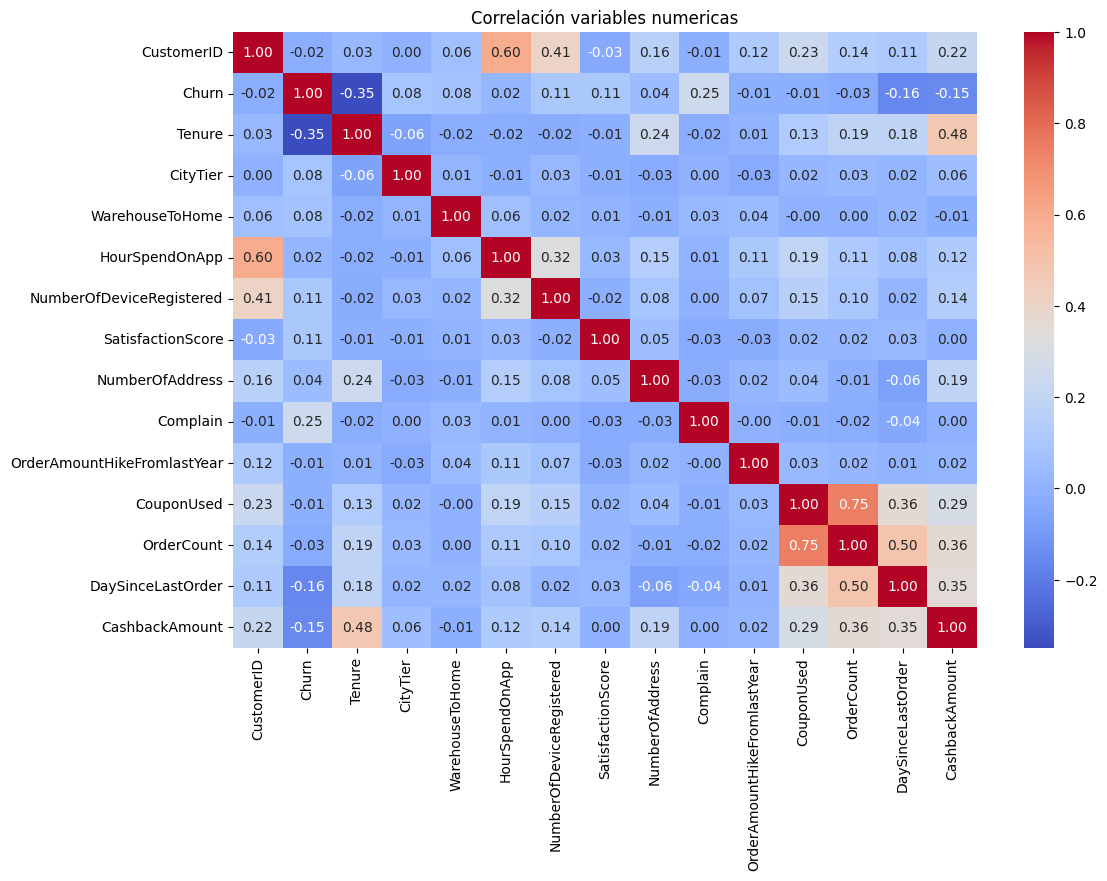

In [ ]:
numeric_df = data_df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlación variables numericas')
plt.show()

# CODIFICACIÓN DE VARIABLES CATEGORICAS

In [ ]:
data_encoded = pd.get_dummies(data_df, drop_first=True)
data_encoded.head()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,50001,1,4.0,3,6.0,3.0,3,2,9,1,...,False,False,False,False,True,False,False,False,False,True
1,50002,1,NaN,1,8.0,3.0,4,3,7,1,...,False,True,True,False,False,True,False,False,False,True
2,50003,1,NaN,1,30.0,2.0,4,3,6,1,...,False,False,True,False,False,True,False,False,False,True
3,50004,1,0.0,3,15.0,2.0,4,5,8,0,...,False,False,True,False,True,False,False,False,False,True
4,50005,1,0.0,1,12.0,NaN,3,5,3,0,...,False,False,True,False,False,True,False,False,False,True


# CORRELACIÓN DE VARIABLE CHURN CON LAS DEMAS

In [ ]:
churn_corr = data_encoded.corr()['Churn'].sort_values(ascending=False)

print(churn_corr.head(10))
print("Menor correlación:")
print(churn_corr.tail(10))

Churn                            1.000000
Complain                         0.250188
MaritalStatus_Single             0.180847
PreferedOrderCat_Mobile Phone    0.154387
PreferedOrderCat_Mobile          0.113364
NumberOfDeviceRegistered         0.107939
SatisfactionScore                0.105481
CityTier                         0.084703
PreferredPaymentMode_COD         0.083933
PreferredLoginDevice_Phone       0.078916
Name: Churn, dtype: float64
Menor correlación:
PreferredPaymentMode_Debit Card       -0.032453
PreferedOrderCat_Others               -0.054903
PreferredPaymentMode_Credit Card      -0.064131
PreferedOrderCat_Grocery              -0.089575
PreferredLoginDevice_Mobile Phone     -0.111639
PreferedOrderCat_Laptop & Accessory   -0.133353
MaritalStatus_Married                 -0.151024
CashbackAmount                        -0.154161
DaySinceLastOrder                     -0.160757
Tenure                                -0.349408
Name: Churn, dtype: float64
